# Header

<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Import

In [1]:
import sys
import os
import getpass
import pandas as pd
import numpy as np
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.1.3 (jupyter)'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

In [2]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

# Access Data

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function in the section **Database Connection** above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [4]:
con = reeem_session()

C:\Anaconda3\envs\reeem-vis\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# Table Info

## Database Query

This section is used to query one specific database table (**db_table**).<br>
The result is saved to a pandas.DataFrame (**df**) and printed.

In [5]:
# Number of entries in table
db_table = 'model_draft.reeem_osembe_output'
sql = text("""
    SELECT  count(*) AS count
    FROM    {0}""".format(db_table))
df = pd.read_sql_query(sql, con)
df

,count
0,487908


In [6]:
# Pathways
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0}
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df = pd.read_sql_query(sql, con)
df

,pathway,count
0,Base,311040
1,Test,176868


In [7]:
# Versions
column = 'version' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0}
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df = pd.read_sql_query(sql, con)
df

,version,count
0,DataV1,487908


In [8]:
# Years
column = 'year' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0} 
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df = pd.read_sql_query(sql, con)
df

,year,count
0,2015,13553
1,2016,13553
2,2017,13553
3,2018,13553
4,2019,13553
5,2020,13553
6,2021,13553
7,2022,13553
8,2023,13553
9,2024,13553


In [9]:
# Regions
column = 'region' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0}
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df = pd.read_sql_query(sql, con)
df

,region,count
0,AT,20052
1,BE,12348
2,BG,12348
3,CH,10008
4,CY,12348
5,CZ,20016
6,DE,20016
7,DK,20016
8,EE,19872
9,ES,12348


In [10]:
# Categories
column = 'field' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0}
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df = pd.read_sql_query(sql, con)
df

,field,count
0,Activity rail_Freight,36
1,Activity rail_Passenger,36
2,Activity Road Vehicle_EV,36
3,Activity Road Vehicle_Other Vehicle,36
4,Activity Road Vehicle_Summe,2124
5,Average electricity price,36
6,Biomass production_Grassy crops,36
7,Biomass production_Other biomass potential (wo...,36
8,Biomass production_Rape seed,36
9,Biomass production_Starch crops,36


In [11]:
# Indicators
column = 'field,indicator,nid' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {1}, count(*) AS count
    FROM    {0}
    GROUP BY {1} 
    ORDER BY {1}; """.format(db_table,column))
df_ind = pd.read_sql_query(sql, con)
df_ind

,field,indicator,nid,count
0,Activity rail_Freight,Freight,387,36
1,Activity rail_Passenger,Passenger,388,36
2,Activity Road Vehicle_EV,EV,384,36
3,Activity Road Vehicle_Other Vehicle,Other Vehicle,385,36
4,Activity Road Vehicle_Summe,Summe,386,2124
5,Average electricity price,Electricity price,372,36
6,Biomass production_Grassy crops,Grassy crops,377,36
7,Biomass production_Other biomass potential (wo...,"Other biomass potential (wood, or not spec.)",378,36
8,Biomass production_Rape seed,Rape seed,373,36
9,Biomass production_Starch crops,Starch crops,375,36


In [12]:
# Save data to CSV
csvname = 'data/reeem_osembe_output_indicators.csv'
df_ind.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

Data saved to file: data/reeem_osembe_output_indicators.csv


# View 0.3: Table metadata
## Database Query

This section can be used to get the metadata from one database table.<br>
The result is printed.<br>

In [13]:
# Database select (SQL)
sql = text("""SELECT obj_description('{0}'::regclass);""".format(db_table))
df_meta = pd.read_sql_query(sql, con).loc[:,'obj_description']
df_meta

0    {\n    "title": "REEEM OSeMBE Output",\n    "d...
Name: obj_description, dtype: object

# View 3: One indicator for all regions in one pathway over time

## Database Query

This section can be used to query one specific **indicator** for all regions from one database table (_table_).<br>
Indicators are identified by the **nid** (_filter 1_).<br>
Only **region** _EU28_ is excluded (_filter 2_).<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_3**) and can be printed.

In [14]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
print(df_3)

     pathway version region  year  nid indicator                       field  \
0       Base  DataV1     AT  2015   59       Sum  Primary energy consumption   
1       Base  DataV1     AT  2016   59       Sum  Primary energy consumption   
2       Base  DataV1     AT  2017   59       Sum  Primary energy consumption   
3       Base  DataV1     AT  2018   59       Sum  Primary energy consumption   
4       Base  DataV1     AT  2019   59       Sum  Primary energy consumption   
5       Base  DataV1     AT  2020   59       Sum  Primary energy consumption   
6       Base  DataV1     AT  2021   59       Sum  Primary energy consumption   
7       Base  DataV1     AT  2022   59       Sum  Primary energy consumption   
8       Base  DataV1     AT  2023   59       Sum  Primary energy consumption   
9       Base  DataV1     AT  2024   59       Sum  Primary energy consumption   
10      Base  DataV1     AT  2025   59       Sum  Primary energy consumption   
11      Base  DataV1     AT  2026   59  

## Metadata

The important information from the above select (**df_3**) is collected in a Dictionary (**info_dict_3**).

In [15]:
# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
for x in info_dict_3:
    print(x,':',info_dict_3[x])

Filename : ['2018-10-10_reeem_plot_3']
Field : ['Primary energy consumption']
Indicator : ['Sum']
Unit : ['PJ']
Pathway : ['Base']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR' 'GR' 'HR'
 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI'
 'SK' 'UK']
Y-Axis : ['Sum in PJ']
Title : ['Sum in all regions']


## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_3p**) and can be printed.

In [16]:
# Reshape dataframe
df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_3**. They can be exchanged with manual text.

(0, 1717.651664215779)

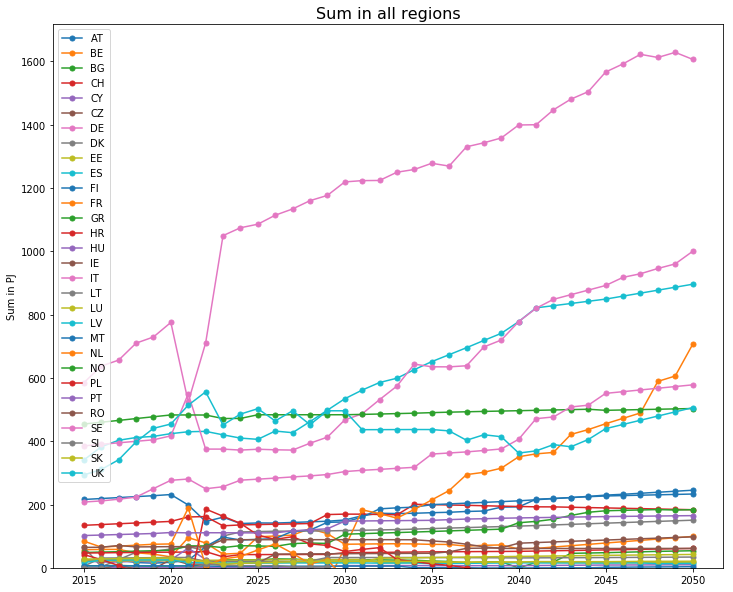

In [17]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in all regions', fontsize=16)  # Manual title
plt.title(*info_dict_3['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_3['Y-Axis'])                    # Label from info
plt.plot(df_3p, 
         marker="o",  markersize=5)
plt.legend(df_3p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [18]:
# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

# Combined

In [22]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
# print(df_3)

# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
# for x in info_dict_3:
#     print(x,':',info_dict_3[x])

# Reshape dataframe
df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

# View 5: All indicators for all regions in one pathway over time

## Database Query

This section can be used to query all **indicator** for all regions from one database table (_table_).<br>
It is possible to select one specific **pathway** (_filter 1_) and one specific data **version** (_filter 2_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_5**) and can be printed.

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  id, nid, pathway, framework, version, 
        region, year, field, indicator, value, 
        unit, aggregation, updated  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE pathway = 'Base'                        -- filter 1
        AND version = 'DataV1'                    -- filter 2
    ORDER BY pathway, version, region, year;      -- sorting """)
df_5 = pd.read_sql_query(sql, con)
df_5.head(5)

## Metadata

The important information from the above select (**df_5**) is collected in a Dictionary (**info_dict_5**).

In [ ]:
# Facts dict
info_dict_5 = {}
info_dict_5['Updated'] = [x.strftime("%Y-%m-%d") for x in df_5.loc[:,'updated'].unique()]
info_dict_5['Filename'] = ['{0}_{1}_OSeMBE_{2}_{3}_Output' .format(
    info_dict_5['Updated'][0],
    df_5.loc[:,'pathway'].unique()[0],
    df_5.loc[:,'framework'].unique()[0],
    df_5.loc[:,'version'].unique()[0])]
#info_dict_5['Category'] = df_5.loc[:,'category'].unique()
#info_dict_5['Indicator'] = df_5.loc[:,'indicator'].unique()
#info_dict_5['Unit'] = df_5.loc[:,'unit'].unique()
info_dict_5['Pathway'] = df_5.loc[:,'pathway'].unique()
info_dict_5['Version'] = df_5.loc[:,'version'].unique()
info_dict_5['Year'] = df_5.loc[:,'year'].unique().tolist()
info_dict_5['Region'] = df_5.loc[:,'region'].unique()
#info_dict_5['Y-Axis'] = ['{} in {}'.format(*info_dict_5['Indicator'], *info_dict_5['Unit'])]
#info_dict_5['Title'] = ['{} in all regions'.format(*info_dict_5['Category'])]
info_dict_5['Metadata'] = df_meta

# Print facts
for x in info_dict_5:
    print(x,':',info_dict_5[x])

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_5['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_5.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_5[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_5['Filename'])
df_5.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)